```{index} hypothesis testing; Bayesian
```

# Bayesian Hypothesis Testing


This section of [*Foundations of Data Science with Python*](https://amzn.to/3VXLixc) considers how Bayesian techniques can be applied in hypothesis testing. Prior sections of the book consider Null Hypothesis Significance Testing (NHST), which can be considered a frequentist technique. NHST has been used since the early 1900s and is a well-accepted technique in many communities. However, NHST also has several important limitations:
* NHST cannot utilize information from other sources about the probability of a hypothesis being true.
* NHST can only evaluate the probability of seeing such an extreme value of a statistic under the null hypothesis; it cannot assign probabilities to the null and alternative hypotheses.
* Moreover, NHST is not easily generalized to handle multiple possible hypotheses.
* The result of an NHST (the $p$-value) is often misinterpreted, and $p$-values are often subject
to manipulation through “$p$ hacking”.

An alternative is to use a Bayesian hypothesis test, in which the goal is to estimate the *a posteriori* distributions for the possible hypotheses. Here the *a posteriori* distribution characterizes the probabilities of the hypotheses after observing the data. Bayesian tests require having a model for the probabilities of the events being investigated *prior to the  data being observed*. This brings the advantage that Bayesian tests can incorporate information from prior tests, but has the disadvantage that there are usually multiple choices for the prior models, which some consider too subjective. An important advantage of Bayesian tests is that they can produce "credible intervals" that characterize a region that will contain the true value with some specified probability.

## Omitted Material on a Bayesian Hypothesis Test on Whether a Die is Loaded (Unfair)

This section uses an example in which a six-sided die has been rolled four times and the result was 1 on every roll. The hypothesis test was to determine the probabilities of the die being fair or unfair. Four different tests are described. The tests depend on the prior models for the die. They are:
1. Simple, uninformative: The die is assumed to be either fair or to always return 1. Under this "uninformative" model, each of these cases is considered equally likely.
2. Simple, informative. he die is assumed to be either fair or to always return 1. Because almost all dice are fair, the probability that the die is unfair is set to much less than 1/2. In the book, a value of 1/100 is used because this is assumed to be a much more extreme value than would be encountered in practice.
3. Extended, uninformative: The die is assumed to return 1 with some probability between 0 and 1; for convenience of discussion, we will call these different "loadings". For this "uninformative" model, the die is equally likely to take on any of the loadings.
4. Extended, uninformative: The die is assumed to return 1 with some probability between 0 and 1. For the "informative" case, we assign 99% of the probability to the loading in which all of the values of the die are equally likely. The remaining probability is assigned equally to all the other loadings.

[*Foundations of Data Science with Python*](https://amzn.to/3VXLixc) omits the details for case 3 because of space constraints. As mentioned above, this uses a type of uninformative prior, where the loading value (the probability that the die comes up 1) is 
equally likely to take any value in $[0,1]$. Because techniques on how to estimate the *a posteriori* probability when the loading $L$ is chosen randomly from the continuous range $[0,1]$ is not covered in prior sections of the book, we instead quantize the range in steps of 0.01:

In [1]:
import numpy as np

all_loadings = np.arange(0, 1.01, 0.01)

Then in the simulation below, we choose a loading at random and then divide the remaining probability among the other five die faces:

In [2]:
import numpy.random as npr
import random
import matplotlib.pyplot as plt

def biased_die_u(rolls=4, target=4, num_sims=100_000):
    """ Simulate randomly choosing the bias for a die (from 0 to 1 by 0.01) and
    then rolling the die "rolls" times. Whenever it comes up 1  "rolls" times, record
    that die's bias.  As before, the relative frequencies of the biases in the resulting set
    approximate the *a posteriori* probability of those biases. """

    # Generate the set of possible loadings
    all_loadings = np.arange(0, 1.01, 0.01)

    events = []
    for sim in range(num_sims):

        # Choose a bias for this die
        L = npr.choice(all_loadings)

        # Now generate a value from a die with that loading and count the number of 1s
        faces = random.choices([1,2,3,4,5,6], weights=[L] + [(1-L)/5]*5, k=rolls)
        num1s = faces.count(1)

        # Record the events with the target number of tails
        if num1s == target:
            events += [L]

    return events

In [3]:
events = biased_die_u()

A histogram of the events shows the frequencies of the loadings. If we want to plot against our original quantized values of the loadings, we need to add one more bin above 1 (because otherwise the last bin will include both 0.99 and 1.0). 

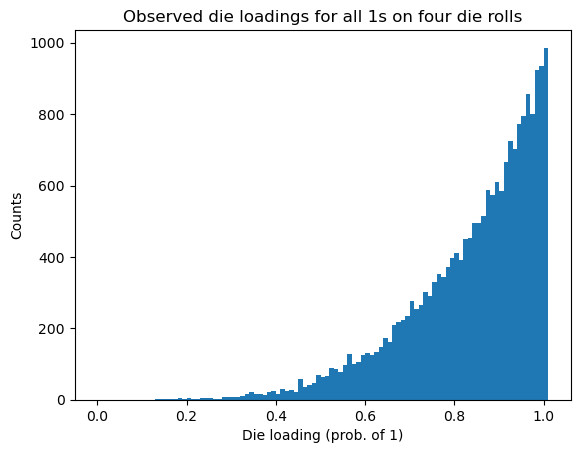

In [4]:
mybins = np.arange(0, 1.02, 0.01)
plt.hist(events, bins = mybins)
plt.xlabel('Die loading (prob. of 1)')
plt.ylabel('Counts')
plt.title('Observed die loadings for all 1s on four die rolls');

These frequencies are approximately proportional to the *a posteriori* probabilities (APPs). As expected, the APPs are largest for those loadings that are closest to 1, since these loadings are most likely to result in getting all 1s on four rolls of a loaded die. By changing the weights, we can create a much more general *a priori* model than we had before. However, we have introduced a new problem:

**How can we turn the APPs into a statistical test --  i.e., how can we make a decision about whether the die could be a fair die based on the *a posteriori* information?**

A typical approach is to find whether the fair die ($L=1/6$) is within a certain range of values where *almost all* of the *a posteriori* probability lies. Such a region a *credible interval* (more details are provided in the book).
For an equal-tail credible interval, the set of values below the credible interval has the same probability as the set of values above the credible interval. 

Consider the histogram produced by `biased_die_u()`. To find the $C$% credible interval, we can find the tail regions of the histogram plot that contain $(1-C)/2$% of the probability. The histogram we created shows (estimated) probabilities, but we are really asking about the *sums* of the probabilities in the tails of the histogram.   We can use the normalized cumulative histogram to find the cumulative relative frequencies: 

Since our prior values come from a discrete set, we need to estimate the cumulative probabilities on that same set. We can do this by using the set of possible prior values as the bins in the histogram. Referring to the documentation for `pyplot.hist()`, when bin edges are specified the rightmost bin is inclusive of both endpoints -- thus if we use `all_loadings` as our bins, then the last bin would include both 0.99 and 1.0. Thus, we just need to add a value higher than 1 to the bins. We also
We also add some lines to delimit the credible interval and the tails. For a 95% credible interval, these correspond to $(100-95)/2 = 2.5$% and $100-2.5 = 97.5$%, respectively: 

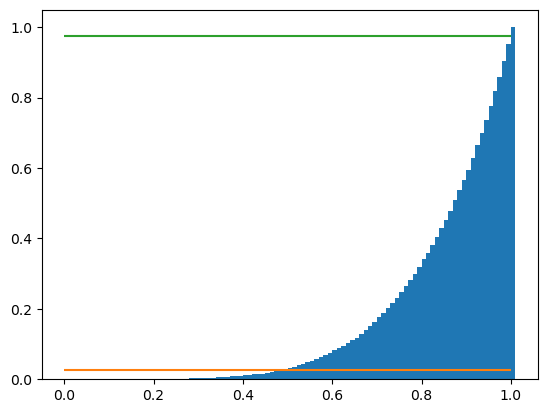

In [5]:
# Generate the set of possible biases
mybins = np.arange(0, 1.02, 0.01)

plt.hist(events, bins=mybins, cumulative=True, density=True)
plt.hlines(0.025, 0, 1, color = 'C1')
plt.hlines(0.975, 0, 1, color = 'C2');

By visual inspection, the 95% credible interval is approximately $[0.4, 0.99]$.  We can more easily and accurately find the credible interval by finding the 2.5% and 97.5% percentiles of the *a posteriori* probabilities:

In [6]:
np.percentile(events, [2.5, 97.5])

array([0.48, 1.  ])

If we considered the 99% credible interval, we would get

In [7]:
np.percentile(events, [1, 99])

array([0.39, 1.  ])

Now we return to our original question: how can we use this to conduct a statistical test for whether the die could be fair? The approach we will use is to evaluate if the fair die is in a $C$% credible interval, where typically $C$% is 95% or 99%. For either case, the fair die ($L=1/6$) is not in the credible interval, so 
using this uninformative prior model, we would say that the case of this being a fair die is not within the 99% credible interval. The problem with this uniformative model is that it does not reflect reality: most dice that we encounter will be fair dice. With the uninformative prior, the probability that the die is fair is only 1/101, where in reality it should be close to 1. This motivates using an informative model for the prior distribution in which most of the probability is allocated to the case in which the die is fair. This model is studied in the book.

**Self Assessment**


In [8]:
from jupyterquiz import display_quiz
git = 'https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
dir =  '07-bayesian-methods/questions/'
quiz = '4-bayesian-hypothesis-testing.json'


display_quiz("questions/" + quiz)

<IPython.core.display.Javascript object>

In [9]:
display_quiz(git + dir + quiz, colors='fdsp')
#print(git+dir+quiz)

<IPython.core.display.Javascript object>

**Terminology Review**

Use the flashcards below to help you review the terminology introduced in this chapter. $~~~~ ~~~~ ~~~~$

In [10]:
from jupytercards import display_flashcards

# display_flashcards("flashcards/bayesian-hypothesis-testing.json")

github = "https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/"
github += "07-bayesian-methods/flashcards/"
display_flashcards(github + "/bayesian-hypothesis-testing.json", title='Bayesian Hypothesis Testing', subject='Bayesian Statistics')

<IPython.core.display.Javascript object>